## 機器學習 HW2: Clustering
### 學號: 311706017     姓名: 陳詩婷

- 匯入資料集


In [10]:
import pandas as pd
import numpy as np


df = pd.read_csv('daimonds_cleaned.csv')   # read file
#df = pd.read_csv('bank_cleaned.csv')   #兩份資料集處理流程大致相同，只是銀行倒閉分析的dataset都是數值資料，不用做encoding

df #show dataframe

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.00000,326,3.95,3.980000,2.43
1,0.21,Premium,E,SI1,59.8,57.45744,326,3.89,3.840000,2.31
2,0.23,Good,E,VS1,56.9,65.00000,327,4.05,4.070000,2.31
3,0.29,Premium,I,SI1,62.4,58.00000,334,4.20,5.734659,2.63
4,0.31,Good,J,SI2,63.3,58.00000,335,4.34,4.350000,2.75
...,...,...,...,...,...,...,...,...,...,...
52921,0.72,Ideal,D,SI1,60.8,57.00000,2757,5.75,5.760000,3.50
52922,0.72,Good,D,SI1,63.1,55.00000,2757,5.69,5.750000,3.61
52923,0.70,Very Good,D,SI1,62.8,60.00000,2757,5.66,5.680000,3.56
52924,0.86,Premium,H,SI2,61.0,58.00000,2757,6.15,6.120000,3.74


## 1. 前處理(Encoding)
- 把label併入dataset中作為特徵使用
- 類別型態的feature做[Frequency Encoding](https://ithelp.ithome.com.tw/articles/10233484)
，方便下一步驟時計算距離

*推薦的encoding方式是Target Encoding和frequency encoding。*
- one-hot encoding容易造成高維詛咒問題，要考慮資料特性斟酌使用
- label encoding本身賦值的意義不明確，要考慮資料特性斟酌使用




In [11]:
# Frequency Encoding 

#pip install category_encoders
import category_encoders as ce

encoder = ce.CountEncoder(cols='cut')
df["cut_encoding"] = encoder.fit_transform(df["cut"]) / len(df['cut'])

encoder = ce.CountEncoder(cols='color')
df["color_encoding"] = encoder.fit_transform(df["color"]) / len(df['color'])

encoder = ce.CountEncoder(cols='clarity')
df["clarity_encoding"] = encoder.fit_transform(df["clarity"]) /len(df['clarity'])

df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoding,color_encoding,clarity_encoding
0,0.23,Ideal,E,SI2,61.5,55.00000,326,3.95,3.980000,2.43,0.410479,0.177871,0.166969
1,0.21,Premium,E,SI1,59.8,57.45744,326,3.89,3.840000,2.31,0.250633,0.177871,0.256320
2,0.23,Good,E,VS1,56.9,65.00000,327,4.05,4.070000,2.31,0.089389,0.177871,0.148887
3,0.29,Premium,I,SI1,62.4,58.00000,334,4.20,5.734659,2.63,0.250633,0.098855,0.256320
4,0.31,Good,J,SI2,63.3,58.00000,335,4.34,4.350000,2.75,0.089389,0.051034,0.166969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52921,0.72,Ideal,D,SI1,60.8,57.00000,2757,5.75,5.760000,3.50,0.410479,0.123418,0.256320
52922,0.72,Good,D,SI1,63.1,55.00000,2757,5.69,5.750000,3.61,0.089389,0.123418,0.256320
52923,0.70,Very Good,D,SI1,62.8,60.00000,2757,5.66,5.680000,3.56,0.220156,0.123418,0.256320
52924,0.86,Premium,H,SI2,61.0,58.00000,2757,6.15,6.120000,3.74,0.250633,0.151098,0.166969


In [ ]:
# Target encoding  
'''
df["cut_encoding"] = df.groupby("cut")["price"].transform("mean") 
df["color_encoding"] = df.groupby("color")["price"].transform("mean")
df["clarity_encoding"] = df.groupby("clarity")["price"].transform("mean")  # Target Encoding 

'''

In [12]:
df = df.drop(['cut', 'color', 'clarity'], axis=1)      # drop 原本的feature，採用encoding後的feature即可

## 2. 建模 & 評估
使用3種演算法:K-Means, C-Means Clustering Algorithms, hierarchical clustering

- k means是硬聚類；c means是軟聚類。兩者會將clustering的函數範圍建成圓形，都是根據距離來分至某群(補充: EM clustering則將聚類建模為概率密度函數 (PDF)，根據機率分至某群)


<img src='https://megapx-assets.dcard.tw/images/5cb261b2-5112-4452-a338-54de100bf671/orig.png'  width='500'/>


- Hierarchical clustering可以提供分群依據的資訊，因此運算成本較K-Means高，兩者可以合併使用(先做K-Means再做hierarchical clustering)
<img src='https://megapx-assets.dcard.tw/images/1b99b3b5-743d-4fae-ad46-8a82095eee4f/orig.png'  width='500'/>



#### [k-means model](https://www.google.com/search?q=python+k+means&rlz=1C1CHBF_zh-TWTW900TW900&oq=python+k+means&aqs=chrome..69i57j0i512l9.4030j0j7&sourceid=chrome&ie=UTF-8)

- 以[Elbow method](https://medium.com/@pahome.chen/clustering%E6%B1%BA%E5%AE%9A%E5%88%86%E7%BE%A4%E6%95%B8%E7%9A%84%E6%96%B9%E6%B3%95-abedc1d81ccb)決定要分為幾群 

In [5]:
#---------------------------------------K means
#pip install scikit-learn-extra 
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


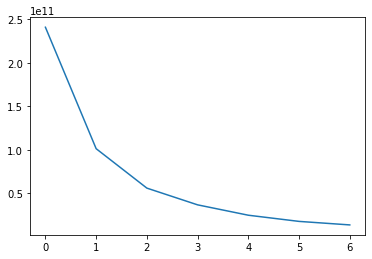

In [13]:
# Elbow-curve

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n in range_n_clusters:                 # n --> clustering數量
    kmeans = KMeans(n_clusters=n, max_iter=50, random_state=0).fit(df)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)# plot the SSDs for each n_clusters




透過elbow method 找到最適合的clustering數量 = 3

In [26]:
n = 3  # 透過elbow method 找到最適合的clustering數量 = 3
kmeans = KMeans(n_clusters=n, random_state=0).fit(df)  #以elbow method找到的最佳群數來分群

print("組內距離:",kmeans.inertia_)
print("群中心:", kmeans.cluster_centers_)

組內距離: 101403783200.9059
群中心: [[ 4.98309618e-01  6.17370679e+01  5.71964451e+01  1.46127752e+03
   5.00751165e+00  5.01373394e+00  3.09313655e+00  2.99091078e-01
   1.65627127e-01  1.72727279e-01  6.05988505e-01]
 [ 1.69850690e+00  6.16493223e+01  5.78756024e+01  1.33429950e+04
   7.60134132e+00  7.60028057e+00  4.67505369e+00  2.83212361e-01
   1.55082309e-01  1.80913528e-01  3.60490267e-04]
 [ 1.11048868e+00  6.18162081e+01  5.78654288e+01  5.78546091e+03
   6.60339997e+00  6.59907871e+00  4.07863801e+00  2.68086148e-01
   1.58224474e-01  1.94224156e-01 -3.08086889e-14]]


#### [c-means model](https://www.kaggle.com/code/abdelrahmankhalil/fuzzy-c-means-with-audit-risk)
- 同樣以[Elbow method](https://medium.com/@pahome.chen/clustering%E6%B1%BA%E5%AE%9A%E5%88%86%E7%BE%A4%E6%95%B8%E7%9A%84%E6%96%B9%E6%B3%95-abedc1d81ccb)決定要分為幾群 

In [15]:
#--------------------------------------C means
# pip install fuzzy_c_means 
# pip install -U pip setuptools wheel
# pip install -U spacy
# pip install -m spacy download en_core_web_sm --user
from fcmeans import FCM

In [25]:
fcmModel = FCM(n_clusters = n) # 同樣以elbow method找到的最佳群數來分群
fcmModel.fit(df.values)


print("群中心:",fcmModel.centers)

 [[1.72347061e+00 6.16597371e+01 5.78869848e+01 1.36137758e+04
  7.64076115e+00 7.63920368e+00 4.69837156e+00 2.82492915e-01
  1.54537944e-01 1.82788707e-01 4.44650984e-04]
 [1.09957312e+00 6.18141792e+01 5.78447800e+01 5.66447236e+03
  6.58144873e+00 6.57715072e+00 4.06507615e+00 2.69156810e-01
  1.58259033e-01 1.96887766e-01 3.98102300e-04]
 [4.75630312e-01 6.17274661e+01 5.71606113e+01 1.34435974e+03
  4.93660430e+00 4.94303340e+00 3.04907441e+00 3.01057942e-01
  1.66021795e-01 1.72065495e-01 6.60022142e-01]]


#### [hierarchical clustering](https://pyecontech.com/2020/06/15/python_hierarchical_clustering/)
嘗試用3種計算距離的方式分群:
- Single Linkage
- Complete Linkage 
- Average Linkage 

In [17]:
#---------------------------------------hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [18]:
from sklearn.cluster import AgglomerativeClustering
mergings_single = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
mergings_single.fit_predict(df)

mergings_complete = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
mergings_complete.fit_predict(df)

mergings_average = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
mergings_average.fit_predict(df)

## 3. 評估K-means 和 C-means哪一個可以找到最佳解?
#### 我採用silhouette_score作為衡量指標，silhouette_score愈接近1代表分群效果愈好。透過此指標發現K-means表現較優，這應該與此演算法的特性有關。

### k-means: 
K-means是一種迭代算法，它將數據點分為K個類別，每個類別的中心點（稱為聚類中心）是平均數。K-means的目標是最小化數據點到它所屬的聚類中心的距離平方和，也就是SSE（sum of squared errors）。K-means的性能受初始聚類中心的選擇和K值的選擇影響。



In [28]:
silhouette_score(df, kmeans.labels_) # 計算silhouette分數

0.6600891221670722

### c-means: 
C-means是一種基於模糊邏輯的聚類算法，它將每個數據點分配到每個類別的概率，每個類別有一個中心點。C-means的目標是最小化數據點到所有聚類中心的距離平方和的加權和，也就是FCM（fuzzy c-means）的目標函數。C-means的性能受初始聚類中心的選擇和模糊因子的選擇影響。

In [35]:
labels = fcmModel.predict(np.array(df))   # 預測每個數據點所屬的聚類

silhouette_score(df, labels, metric='euclidean')  # 計算silhouette分數

0.6600864077630493